# ORIE 4580/5580/5581 Assignment 2

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Note: I used chatgpt to help format all markdown text cells to look good. None of my text was edited by chatgpt, I simply used it to put my work into latex.**


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.


This PMF represents $N_p$ because while flipping the first coin, you naturally have a probability of P to land on heads, and that would mean you flipped 1 coin to get a heads so your count is 1. However, if you flip a tails with probability 1-p, you have to flip another coin with the same set of outcomes. You either land on heads with probability p and stop or land on tails with probability 1-p and keep going. Thus, your number of flips is 1+$\tilde{N}_p$, since you flipped 1 coin and must repeat.

$$
E[N_p] = p \cdot 1 + (1-p) \cdot (1 + E[N_p])
$$

$$
E[N_p] = p + (1-p) + (1-p) E[N_p]
$$

$$
E[N_p] = 1 + E[N_p] - p E[N_p]
$$

$$
p E[N_p] = 1
$$

$$
E[N_p] = \frac{1}{p}
$$


By the law of total variance,

$Var[N_p] = E[Var[N_p \mid F]] + Var[E[N_p \mid F]]$

where $F$ is the result of the first flip.

$Var[N_p \mid \text{Heads}] = 0$,  
$Var[N_p \mid \text{Tails}] = Var[\tilde{N}_p] = Var[N_p]$

$E[N_p \mid \text{Heads}] = 1$,  
$E[N_p \mid \text{Tails}] = 1 + E[N_p]$

Thus, $E[N_p \mid \text{First Flip}]$ is a random variable that gives $1$ with probability $p$ and $1 + E[N_p]$ with probability $1-p$. Let us denote this random variable by $F$.

$E[Var[N_p \mid F]] = p \cdot 0 + (1-p) \cdot Var[N_p] = (1-p) Var[N_p]$

$Var[E[N_p \mid \text{First Flip}]] = Var[F] = E[F^2] - (E[F])^2$

By the variance formula for a 2-point distribution:

$Var[F] = p(1-p)(a-b)^2 = p(1-p)(1 - (1 + E[N_p]))^2 = p(1-p)(E[N_p])^2 = p(1-p)\left(\frac{1}{p}\right)^2$

Thus,

$Var[E[N_p \mid \text{First Flip}]] = \frac{1-p}{p}$

Finally, by the law of total variance:

$Var[N_p] = (1-p) Var[N_p] + \frac{1-p}{p}$

Solving for $Var[N_p]$:

$(1 - (1-p)) Var[N_p] = \frac{1-p}{p}$

$Var[N_p] = \frac{1-p}{p^2}$


___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.


Let $I_j$ be an indicator variable for point $j$ that is $1$ if $X^2 + Y^2 \leq 1$.

$N_c = \sum_{j=1}^{n} I_j$

Since each $I_j$ is a Bernoulli random variable with probability $p = \pi/4$, $N_c$ is Binomial$(n,p)$.

$E[N_c] = n p = n \cdot \pi/4$

$Var[N_c] = n p (1-p) = n \cdot \pi/4 \cdot (1 - \pi/4) = n \cdot \pi/4 \cdot 3\pi/4$

Our estimate for $\pi$ is  

$\pi^* = \frac{4 N_c}{n}$

$E[\pi^*] = 4 \cdot \frac{E[N_c]}{n} = 4 \cdot \frac{n \cdot (\pi/4)}{n} = \pi$

$Var[\pi^*] = \left(\frac{4}{n}\right)^2 Var[N_c] = \left(\frac{4}{n}\right)^2 \cdot n p (1-p)$

$= \frac{16}{n} \cdot p (1-p) = \frac{16}{n} \cdot \pi/4 \cdot 3\pi/4$

$= \frac{4\pi - \pi^2}{n}$

$SE(\pi^*) = \sqrt{\frac{4\pi - \pi^2}{n}} = \sqrt{\frac{2.6967}{n}}$

A 95\% confidence interval for $\pi^*$:

$CI(\pi^*) = \pi^* \pm 1.96 \cdot SE(\pi^*) = \pi^* \pm \frac{2.64}{\sqrt{n}}$


This confidence interval is no better than the confidence interval found in the previous homework, as it uses a binomial rv to estimate pi in the same way, though with a different initial approach.

---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.



Let $I_j$ be an indicator variable for each destination floor $j$ that is $1$ if at least 1 of the 4 people wants to go to floor $j$.

The number of elevator stops is  

$S = \sum_{j=1}^{5} I_j$

Then,

$E[S] = \sum_{j=1}^{5} E[I_j]$

Since all the floors have identical probability of being chosen:

$E[S] = 5 \cdot P(\text{a floor is chosen by at least 1 person})$

$E[S] = 5 \cdot \left( 1 - \left(\frac{4}{5}\right)^4 \right) = 2.952$


---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.



Let $I_j$ be an indicator variable for each of my friends $j$ that is $1$ if they are also friends with my partner.

$P(I_j = 1) = \frac{440}{22000}$

The expected number of common friends is  

$E[\text{Common Friends}] = \sum_{j=1}^{500} E[I_j] = 500 \cdot \frac{440}{22000}$

$E[\text{Common Friends}] = 10$


___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.



**i) Never met each other last week**

If each person did not meet each other, the individual probability they have COVID is Bernoulli(p). Thus, together, the number of total COVID positives is Binomial(n,p). Thus, mean = np and variance = np(1-p)

**ii) All lived in the same house**

If all people lived in the same house together, their individual probability of COVID is still Bernoulli(p) but are correlated. The mean = np still, but the variance is different since there is correlation, which we will denote to be Z for each pair of people. Thus, each pair of people has covariance of Zp(1-p). Since the variance = sum var + 2 sum covar, we get variance = np(1-p)+n(n-1)(Zp(1-p)) = np(1-p)(1+(n-1)Z).

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.



Each individual person having COVID can be represented by  

$I_j \sim \text{Bernoulli}(p)$ for person $j$.

If the whole pool is negative, we only run 1 test. If the pool is positive, we run $1 + n$ tests.  

The distribution of the total number of tests $T$ is:

$P(T = 1) = P(N = 0) = (1-p)^n$

$P(T = 1+n) = 1 - (1-p)^n$

The expected number of tests is:

$E[T] = 1 \cdot (1-p)^n + (1+n) \cdot (1 - (1-p)^n)$

$E[T] = (1+n) - n(1-p)^n$

We can also write $T$ as

$T = 1 + n \cdot B$,

where $B \sim \text{Bernoulli}(1 - (1-p)^n)$. Thus,

$Var[T] = n^2 \cdot Var(B) = n^2 \cdot (1-p)^n \cdot (1 - (1-p)^n)$


___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

### Ans.



Minimum Average Number of Tests Per Person: 0.019950656341507167
Pool Size for Min Number of Tests Per Person: 101


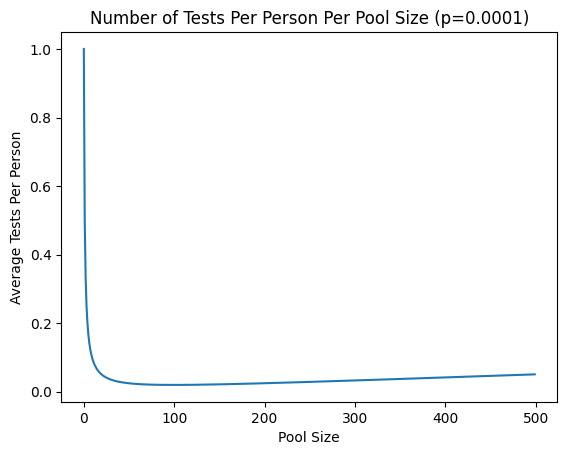

In [2]:
p = 0.0001
exp = []
for n in np.arange(1,501):
  exp.append((1+n)/n - (1-p)**n)

plt.plot(exp)
plt.title("Number of Tests Per Person Per Pool Size (p=0.0001)")
plt.xlabel("Pool Size")
plt.ylabel("Average Tests Per Person")
print("Minimum Average Number of Tests Per Person: " + str( min(exp)))
print("Pool Size for Min Number of Tests Per Person: " + str(exp.index(min(exp))+1))

Minimum Average Number of Tests Per Person: 0.19557083665037445
Pool Size for Min Number of Tests Per Person: 11


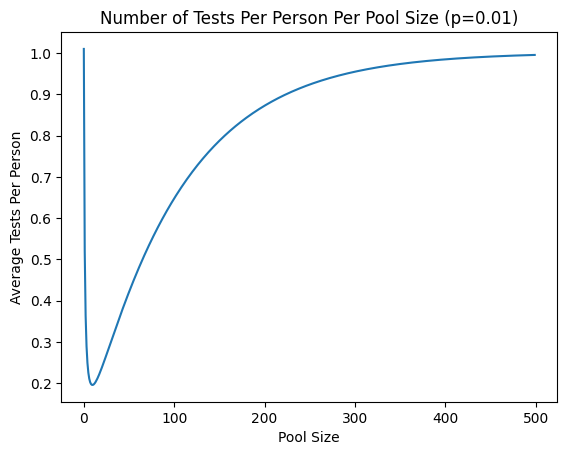

In [3]:
p = 0.01
exp = []
for n in np.arange(1,501):
  exp.append((1+n)/n - (1-p)**n)

plt.plot(exp)
plt.title("Number of Tests Per Person Per Pool Size (p=0.01)")
plt.xlabel("Pool Size")
plt.ylabel("Average Tests Per Person")
print("Minimum Average Number of Tests Per Person: " + str( min(exp)))
print("Pool Size for Min Number of Tests Per Person: " + str(exp.index(min(exp))+1))



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

The correct answer is the first equation $\frac{1}{1 + \exp(-10(C - 35))}$. When comparing the two models on a graph, one starts at 1 and dips to 0 around C=35, while the other does the opposite. Based on the description, false negatives are more likely when viral load is low, and cycle threshold C has an inverse relationship with viral load. Thus, Higher cycle threshold must give higher chance of false negative, making this equation the proper model.



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



Text(0.5, 1.0, 'False Negative Rate for Different Pool Sizes')

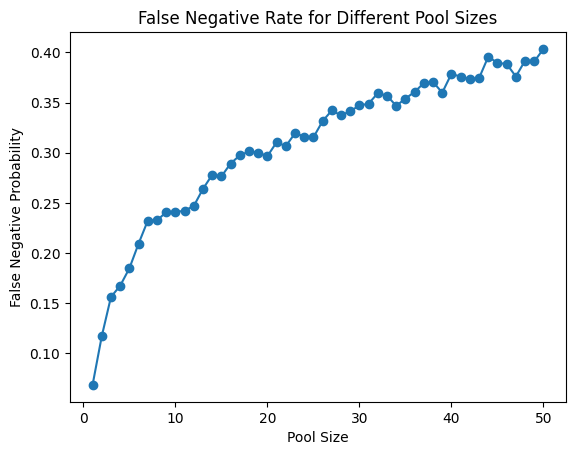

In [4]:
# I used assistance from chatgpt to understand how i could implement the mixture
# of Gaussian distribution. That is how I learned about rng and how I could use
# it to define the distribution.

m = 5000
p = [0.40, 0.50, 0.10]
mean = [20.0, 30.0, 34.78]
sd = [3.5, 3.0, 1.15]

rates = []
for n in np.arange(1, 51):
  rng = np.random.default_rng()
  comp = rng.choice(3, size=m, p=p)
  C = np.zeros(m)
  for k in range(3):
    matchcomp = comp == k
    C[matchcomp] = rng.normal(mean[k], sd[k], size=matchcomp.sum())
  C_pooled = C + np.log2(n)
  prob = 1 / (1 + np.exp(-10 * (C_pooled - 35)))
  rates.append(prob.mean())

plt.plot(np.arange(1, 51), rates, marker='o')
plt.xlabel("Pool Size")
plt.ylabel("False Negative Probability")
plt.title("False Negative Rate for Different Pool Sizes")

## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

In [5]:
# Code from class
def buffon(N,length,dist,num_lines = 2,seed=-1):
    """
    Generates a design matrix with Gaussian basis functions

    Parameters
    ----------
    N: number of throws
    length: length of toothpick
    dist: distance between lines
    num_lines: number of lines (should be >=2)
    seed: seed for random number generator; -1 for no seed

    Returns
    ----------
    sim_data: list of length N with outputs of sims
              each simulation output comprises:
              (tuples) (x_1,y_1), (x_2,y_2) of toothpick endpoints
              (int) number of line crossings

    """

    # Setting seed for PRNG (using -1 for no seed)
    if seed!=-1:
      np.random.seed(seed)

    # Generate random centers and angles of toothpicks
    # np.random.rand() generates a U[0,1] random variable
    xcent = 1+(num_lines-1)*np.random.rand(N)
    ycent = 1+(num_lines-1)*np.random.rand(N)
    theta = (np.pi/2.0)*np.random.rand(N)

    # Count number of times each toothpick touches a line
    crossed = (ycent - np.floor(ycent) - (length/2.0)*np.sin(theta) < 0).astype(int) + (ycent - np.floor(ycent) + (length/2.0)*np.sin(theta) > dist).astype(int)

    # Return toothpick endpoints, number of times each toothpick crosses
    sim_data  = list(zip(list(zip(xcent - (length/2.0)*np.cos(theta),ycent - (length/2.0)*np.sin(theta))),
                     list(zip(xcent + (length/2.0)*np.cos(theta),ycent + (length/2.0)*np.sin(theta))),
                     crossed))

    return sim_data

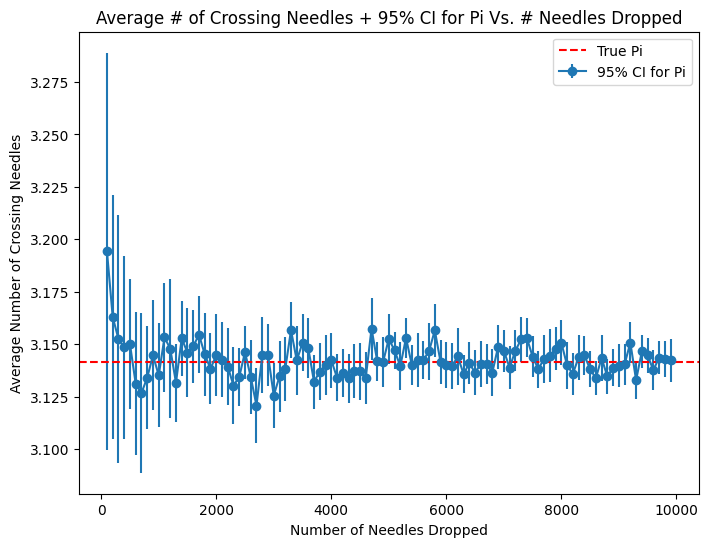

In [6]:
# I used Chatgpt to learn how to include the error bars and line for the true
# value of pi.

#I used this range because going from 10 to 10000 did not run on my laptop.
ran = 100*np.arange(1,100)

avgnumcross = []
ci_lower = []
ci_upper = []

for n in ran:
  estimate = []
  for i in range(30):
    data = buffon(n,1,1,num_lines=5)
    crossed = np.cumsum([data[j][2] for j in range(n)])
    estimate.append(np.max(crossed))
  mean_est = np.mean(2*n/estimate)
  std_est = np.std(2*n/estimate)
  ci = 1.96 * std_est / np.sqrt(30)

  avgnumcross.append(mean_est)
  ci_lower.append(mean_est - ci)
  ci_upper.append(mean_est + ci)



plt.figure(figsize=(8,6))
plt.title("Average # of Crossing Needles + 95% CI for Pi Vs. # Needles Dropped")
plt.errorbar(ran, avgnumcross, yerr=[np.array(avgnumcross)-np.array(ci_lower),\
                                     np.array(ci_upper)-np.array(avgnumcross)],\
              fmt='o-', label = "95% CI for Pi")
plt.axhline(np.pi, color='red', linestyle='--', label="True Pi")
plt.xlabel('Number of Needles Dropped')
plt.ylabel('Average Number of Crossing Needles')
plt.legend()


---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

In [7]:
n = 100000
estimate = []
for i in range(100):
  data = buffon(n,1,1,num_lines=5)
  crossed = np.cumsum([data[j][2] for j in range(n)])
  estimate.append(np.max(crossed))
mean_est = 2*n / np.mean(estimate)
ci = 1.96 * std_est / np.sqrt(30)
ci_lower = mean_est - ci
ci_upper = mean_est + ci
print("Estimate for pi when n=100: " + str(mean_est))
print("95% Confidence Interval: " + str(ci_lower) + "-" + str(ci_upper))

Estimate for pi when n=100: 3.141711943971966
95% Confidence Interval: 3.1313025816347158-3.152121306309216


After running this test a few times, it appears dropping 100 needles results in an overapproximation for pi.

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

**I used chatgpt to help determine how to go from our estimator for pi to an inequality.**

The probability a needle crosses a line is $2/\pi$.

If $X \sim \text{Binomial}(n, 2/\pi)$, then $E[X] = 2n/\pi$.

Our estimator for $\pi$ is  

$\pi^* = \frac{2n}{X}$.

Then, by Jensen's inequality:

$E[\pi^*] = 2n \cdot E\left[\frac{1}{X}\right] > \frac{2n}{E[X]} = \frac{2n}{2n/\pi} = \pi$

Thus, $E[\pi^*] > \pi$.


**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

Let $N_{cross} / n = p$ be the percentage of needles that cross a line. Note that $\pi^* = 2/p$.

A 95\% confidence interval for $p$ is:

$p_{\bar{}} \pm 1.96 \cdot \frac{s_p}{\sqrt{m}}$  

where $m$ is the number of trials.

Using this and our equation for $\pi^*$, we can get a confidence interval for $\pi^*$:

$CI_{\pi^*} = \left( \frac{2}{U}, \frac{2}{L} \right)$

where $U$ and $L$ are the upper and lower bounds of the 95\% CI for $p$.


**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

Let the number of people that show up by 7pm be  

$B \sim \text{Binomial}(1600, 0.95)$.

We want to find  

$P(B > 1500) = 1 - P(B \leq 1500)$.


In [8]:
import math

sum = 0
for i in np.arange(1501,1600):
  sum += math.comb(1600, i) * 0.95**i * 0.05**(1600-i)

print("Probability to Prove Overbooking: " + str(round(sum,4)))

Probability to Prove Overbooking: 0.9852


**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1600) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

In [9]:
np.random.seed(228)
n = 5000

eprofits = []
for n in np.arange(1500, 1700):
    # simulate number of attendees
    attendees = np.random.binomial(n, 0.95, size=n)
    # compute profit
    profits = 100 * n - 500 * np.maximum(attendees - 1500, 0)
    eprofits.append(np.mean(profits))

opttickets = np.arange(1500, 1700)[np.argmax(eprofits)]
optprofit = eprofits[np.argmax(eprofits)]

print("Optimal number of tickets: " + str(opttickets))
print("Optimal profit: " + str(optprofit))
print("Tickets over 1600: " + str(np.argmax(eprofits)-100))


Optimal number of tickets: 1571
Optimal profit: 156685.93252705282
Tickets over 1600: -29




---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.